In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pretty_midi
import pypianoroll
import mido

from tiv import *

In [112]:
bar8_cp_np = np.load('data/bar8_cp_np.npy')
bar8_cp_wq_np = np.load('data/bar8_cp_with_quality_np.npy')

In [43]:
complexity = bar8_cp_wq_np.sum(2)

In [63]:
diff = (bar8_cp_np - bar8_cp_wq_np).sum(2)

In [64]:
diff.shape

45143.0

In [61]:
cd = diff.reshape(-1)

(array([168225.,      0.,      0.,  39322.,      0.,      0.,   1394.,
             0.,      0.,   1011.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

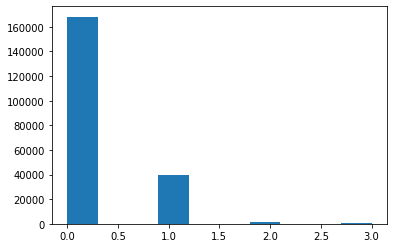

In [62]:
plt.hist(cd)

In [113]:
x0 = bar8_cp_np[0]

In [73]:
tiv_x0 = TIV.from_pcp(x0)

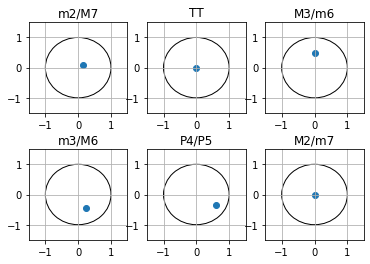

In [75]:
tiv_x0.plot_tiv()

In [76]:
tiv_x0.mags()

array([5.49038106e-01, 2.22044605e-16, 5.75000000e+00, 7.50000000e+00,
       9.90368418e+00, 0.00000000e+00])

In [77]:
tiv_x0.phases()

array([ 0.52359878,  0.        ,  1.57079633, -1.04719755, -0.52359878,
        0.        ])

In [118]:
def get_tiv_polar(chroma):
    '''
    input: 12 dims chroma
    return: 12 dims TIV in polar coordinate, first 6 dims--mags, last 6 dims-- phases
    '''
    tiv = TIV.from_pcp(chroma)
    tiv_polar = np.concatenate((tiv.mags(), tiv.phases()))
    
    return tiv_polar

def get_tiv_polar_list(chroma_list):
    tiv_list = chroma_list.copy()
    for i in range(chroma_list.shape[0]):
        tiv_list[i][:] = get_tiv_polar(chroma_list[i][:])
    return tiv_list

def chroma2tiv_np(chroma_chunk):
    tiv_chunk = chroma_chunk.copy()
    for i in range(chroma_chunk.shape[0]):
        tiv_chunk[i] = get_tiv_polar_list(chroma_chunk[i])
    return tiv_chunk

In [122]:
bar8_cp_tiv_np = chroma2tiv_np(bar8_cp_np)
bar8_cp_wq_tiv_np = chroma2tiv_np(bar8_cp_wq_np)

In [123]:
np.save('bar8_cp_tiv_np.npy', bar8_cp_tiv_np)
np.save('bar8_cp_wq_tiv_np.npy', bar8_cp_wq_tiv_np)

In [115]:
get_tiv_polar(x0[0])

array([ 5.49038106e-01,  2.22044605e-16,  5.75000000e+00,  7.50000000e+00,
        9.90368418e+00,  0.00000000e+00,  5.23598776e-01,  0.00000000e+00,
        1.57079633e+00, -1.04719755e+00, -5.23598776e-01,  0.00000000e+00])

In [114]:
x0[0]

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])